# Here's some data!

### 1. Import the data. It's stored in a file called 'movie_data_detailed.xlsx'.

In [1]:
import pandas as pd

In [6]:
df = pd.read_excel('movie_data_detailed.xlsx')

### 2. Fill all the null values with zero.

In [12]:
df = df.fillna(0)
df.head()

,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes
0,13000000,25682380,21 &amp; Over,0.0,2008.0,6.8,48.0,206513.0
1,45658735,13414714,Dredd 3D,0.0,2012.0,0.0,0.0,0.0
2,20000000,53107035,12 Years a Slave,0.0,2013.0,8.1,96.0,537525.0
3,61000000,75612460,2 Guns,0.0,2013.0,6.7,55.0,173726.0
4,40000000,95020213,42,0.0,2013.0,7.5,62.0,74170.0


### 3. Normalize the data so that all features have a minimum of zero and a maximum of one.

In [18]:
for col in df.columns: 
    if col == 'title':
        continue
    else:
        min_ = df[col].min()
        max_ = df[col].max()
        df[col] = (df[col] - min_) / (max_ - min_)

df.head()

,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes
0,0.034169,0.055325,21 &amp; Over,NaN,0.997516,0.839506,0.500000,0.384192
1,0.182956,0.023779,Dredd 3D,NaN,0.999503,0.000000,0.000000,0.000000
2,0.066059,0.125847,12 Years a Slave,NaN,1.000000,1.000000,1.000000,1.000000
3,0.252847,0.183719,2 Guns,NaN,1.000000,0.827160,0.572917,0.323196
4,0.157175,0.233625,42,NaN,1.000000,0.925926,0.645833,0.137984


### 4. Define 4 variables: X_train, Y_train, X_test, Y_test using a 80-20 split for train and test data. X should be a matrix of data features predicting y, Domestic Gross Sales.  Use random_state=42 for consistency.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df[['budget', 'Year', 'imdbRating', 'Metascore', 'imdbVotes']]
y = df.domgross

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=42)

### 5. Import import sklearn.linear_model.LinearRegression
Create an instance of the LinearRegression class.
Then use the fit method to train a model according to the data.

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
#Create Instance of LinearRegression (Ordinary Least Squares Regressor)
ols = LinearRegression()

In [59]:
#Fit the model to the train set
ols.fit(X_train,y_train)
y_hat_train = ols.predict(X_train)
y_hat_test = ols.predict(X_test)

### 6. Scatter Plot <a id="scatter"></a>  
Create a Scatter Plot of the budget and  Domestic Gross (domgross) along with your model's predictions.

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

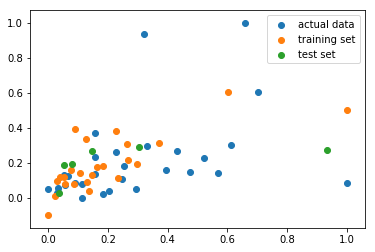

In [60]:
#Scatter Plot
plt.scatter(df.budget,df.domgross,label='actual data')
plt.scatter(y_train,y_hat_train,label='training set')
plt.scatter(y_test,y_hat_test,label='test set')
plt.legend();

### 7. Calculate the RSS for both the train and test sets.
Define a function called rss(y,y_hat). Call it on the train and test sets.

In [70]:
def rss(y, y_hat):
    return round(sum((y-y_hat)**2),6)

In [71]:
print('RSS Training: {}'.format(rss(y_train,y_hat_train)))
print('RSS Test: {}'.format(rss(y_test,y_hat_test)))

RSS Training: 0.489128
RSS Test: 0.484808
